# Scraping the novel : The Piazza Tales
----------

In [1]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud

In [2]:
r=requests.get('http://www.gutenberg.org/files/15859/15859-h/15859-h.htm')

In [3]:
html = r.text

In [4]:
print(html[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<title>The Project Gutenberg eBook of The Piazza Tales, by Herman Melville</title>
<style title="Standard Format" type="text/css">

body.tei            { margin: 4ex 10%; text-align: justify }

div.frontpage                { margin: 4em 0em }
div.content


In [5]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

In [6]:
len(text)

504373

In [7]:
print(text[95000:100000])


to it, just where I had left it the evening
previous.
He answered nothing.
"Will you, or will you not, quit me?" I now
demanded in a sudden passion, advancing close
to him.
"I would prefer not to quit you," he replied
gently emphasizing the not.
[pg 084]

"What earthly right have you to stay here?
Do you pay any rent? Do you pay my taxes?
Or is this property yours?"
He answered nothing.
"Are you ready to go on and write now?
Are your eyes recovered? Could you copy a
small paper for me this morning? or help examine
a few lines? or step round to the post-office?
In a word, will you do anything at all,
to give a coloring to your refusal to depart the
premises?"
He silently retired into his hermitage.
I was now in such a state of nervous resentment
that I thought it but prudent to check
myself at present from further demonstrations.
Bartleby and I were alone. I remembered the
tragedy of the unfortunate Adams and the still
more unfortunate Colt in the solitary office of
the latter; and how

In [8]:
#The text of the novel contains a lot of unwantend stuff, we need to remove them
#We will start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) 
#Then then split the text into a list of words
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [9]:
tokens = tokenizer.tokenize(text)

In [10]:
len(tokens)

86146

In [11]:
print(tokens[0:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Piazza', 'Tales', 'by', 'Herman']


In [12]:
print(tokens[10000:11000])

['an', 'important', 'suit', 'and', 'great', 'accuracy', 'was', 'imperative', 'Having', 'all', 'things', 'arranged', 'I', 'called', 'Turkey', 'Nippers', 'and', 'Ginger', 'Nut', 'from', 'the', 'next', 'room', 'meaning', 'to', 'place', 'the', 'four', 'copies', 'in', 'the', 'hands', 'of', 'my', 'four', 'clerks', 'while', 'I', 'should', 'read', 'from', 'the', 'original', 'Accordingly', 'Turkey', 'Nippers', 'and', 'Ginger', 'Nut', 'had', 'taken', 'their', 'seats', 'in', 'a', 'row', 'each', 'with', 'his', 'document', 'in', 'his', 'hand', 'when', 'I', 'called', 'to', 'Bartleby', 'to', 'join', 'this', 'interesting', 'group', 'Bartleby', 'quick', 'I', 'am', 'waiting', 'I', 'heard', 'a', 'slow', 'scrape', 'of', 'his', 'chair', 'legs', 'on', 'the', 'uncarpeted', 'floor', 'and', 'soon', 'he', 'appeared', 'standing', 'at', 'the', 'entrance', 'of', 'his', 'hermitage', 'What', 'is', 'wanted', 'said', 'he', 'mildly', 'The', 'copies', 'the', 'copies', 'said', 'I', 'hurriedly', 'We', 'are', 'going', 'to'

In [13]:
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [14]:
#English stop words from nltk

stopwords = nltk.corpus.stopwords.words('english')

In [15]:
#Now we need to remove the stop words from the words variable
words_new = []

#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [16]:
len(words_new)

44885

In [17]:
print(words_new[0:10])

['project', 'gutenberg', 'ebook', 'piazza', 'tales', 'herman', 'melville', 'body', 'tei', 'margin']


In [18]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

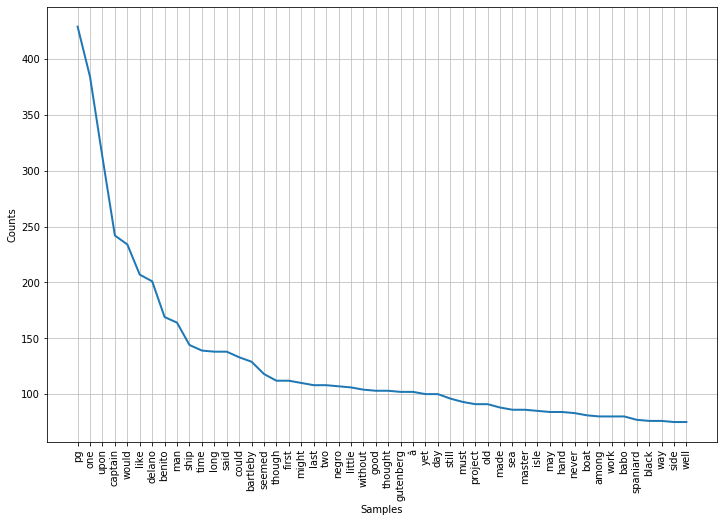

In [19]:
#Frequency Distribution Plot
plt.subplots(figsize=(12,8))
freq_dist.plot(50)

In [20]:
#converting into string

res=' '.join([i for i in words_new if not i.isdigit()]) 

In [21]:
res[0:100]

'project gutenberg ebook piazza tales herman melville body tei margin 4ex text align justify div fron'

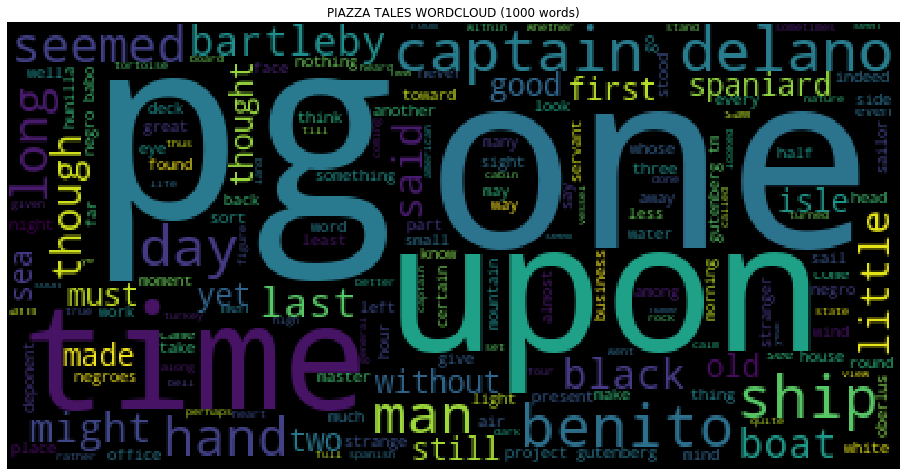

In [22]:
 plt.subplots(figsize=(16,10))
wordcloud = WordCloud(max_words=1000).generate(res)
plt.imshow(wordcloud)
plt.title('PIAZZA TALES WORDCLOUD (1000 words)')
plt.axis('off')
plt.show()